In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from keras import objectives

In [2]:
def pix2pix_loss(y_true, y_pred):
    y_true_flat = K.batch_flatten(y_true)
    y_pred_flat = K.batch_flatten(y_pred)

    # Adversarial Loss
    L_adv = objectives.binary_crossentropy(y_true_flat, y_pred_flat)

    # A to B loss
    # b_flat = K.batch_flatten(b)
    # bp_flat = K.batch_flatten(bp)
    L_atob = K.mean(K.abs(y_true_flat - y_pred_flat))

    return L_adv + 100 * L_atob

In [3]:
ratio = 6
imsize = 256

def predict_and_concat_(model,x_test,ratio=ratio,imsize=imsize):
    result = x_test.copy()*255
    y_list = model.predict(x_test)
    print(y_list.shape)
#    print(result[int(result.shape[1]/4):3*int(result.shape[1]/4),int(result.shape[2]/4):3*int(result.shape[2]/4),:].shape)
#    print(y[int(y.shape[0]/4):3*int(y.shape[0]/4),int(y.shape[1]/4):3*int(y.shape[1]/4),:])
    for index,y in enumerate(y_list):
        result[index,int(result.shape[1]/4):3*int(result.shape[1]/4),int(result.shape[2]/4):3*int(result.shape[2]/4),:] = y #[int(y.shape[0]/4):3*int(y.shape[0]/4),int(y.shape[1]/4):3*int(y.shape[1]/4),:]
    
    zero_list=[]
    for i in result:
        k = np.random.randint(0,len(result))
        row,col=np.where(result[k,int(result.shape[1]/4):3*int(result.shape[1]/4),int(result.shape[2]/4):3*int(result.shape[2]/4),0]==0)
        temp=[]
        for j in range(len(row)):
            temp.append((row[j],col[j]))
        zero_list.append(set(temp))
    
    standard = zero_list[0]
    for l in zero_list[1:]:
        standard = standard&l
    
    for img in result:
        for index in standard:
            std_row = index[0]+int(result.shape[1]/4)
            std_col = index[1]+int(result.shape[2]/4)
            img[std_row,std_col,0]=\
            (img[std_row-1,std_col-1,0]+img[std_row-1,std_col,0]+img[std_row,std_col+1,0]+img[std_row,std_col-1,0]+img[std_row,std_col+1,0]+img[std_row+1,std_col-1,0]+img[std_row+1,std_col,0]+img[std_row+1,std_col+1,0])/8       
    return result/255

def predict_and_concat(model,x_test,ratio=ratio,imsize=imsize):
    result = x_test.copy()*255
    y_list = model.predict(x_test)
    print(y_list.shape)
#    print(result[int(result.shape[1]/4):3*int(result.shape[1]/4),int(result.shape[2]/4):3*int(result.shape[2]/4),:].shape)
#    print(y[int(y.shape[0]/4):3*int(y.shape[0]/4),int(y.shape[1]/4):3*int(y.shape[1]/4),:])
    for index,y in enumerate(y_list):
        result[index,int(result.shape[1]/4):3*int(result.shape[1]/4),int(result.shape[2]/4):3*int(result.shape[2]/4),:] = y #[int(y.shape[0]/4):3*int(y.shape[0]/4),int(y.shape[1]/4):3*int(y.shape[1]/4),:]

    return result/255


In [12]:
# model = load_model("G:/내 드라이브/P_project/datasets/models/pix2pix_mse_color____________________.h5")
model = load_model("G:/내 드라이브/P_project/datasets/models/pix2pix_mae_customloss_standard_8.h5",compile=False)

In [13]:
# x_test_2 = (np.load("G:/내 드라이브/P_project/datasets/test/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)))/255.0-0.5)/0.5
x_test = ((np.load("G:/내 드라이브/P_project/datasets/test/npy/npy_x_{}_{}.npy".format(str(imsize),str(ratio)))/255.0)-0.5)/0.5
y_test = np.load("G:/내 드라이브/P_project/datasets/test/npy/npy_y_{}_{}.npy".format(str(imsize),str(ratio)))

In [14]:
y_pred = (model.predict(x_test)+1)*127.5

In [ ]:
yy = np.round(y_pred)
yy.shape

In [15]:
k = 0

x_test.shape,y_test.shape

((1777, 256, 256, 3), (1777, 256, 256, 3))

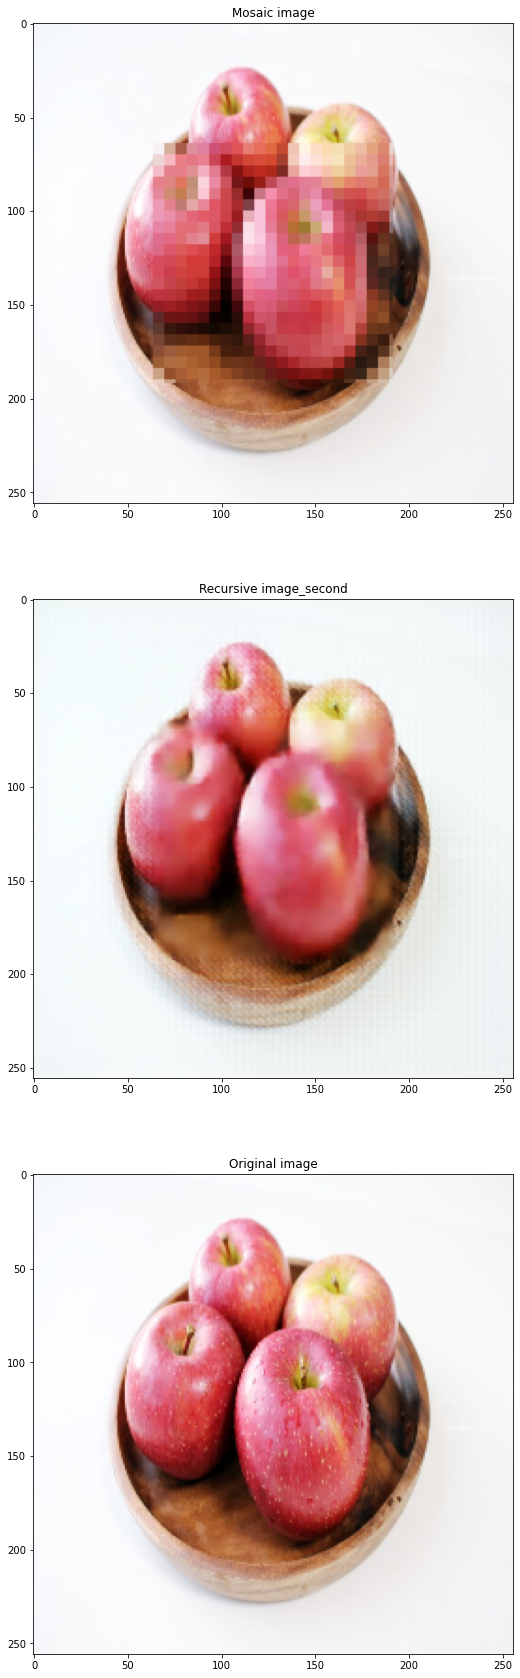

In [18]:
k+=5
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plt.title("Mosaic image")
plt.imshow(127.5*(x_test[k]+1))
plt.subplot(3,1,2)
plt.title("Recursive image_second")
plt.imshow(y_pred[k]/255)
plt.subplot(3,1,3)
plt.title("Original image")
plt.imshow(y_test[k],cmap='gray')

# 128 결과

In [44]:
k = 0

x_test.shape,y_test.shape

((1777, 256, 256, 3), (1777, 256, 256, 3))

In [ ]:
k+=1
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plt.title("Mosaic image")
plt.imshow(127.5*(x_test[k]+1))
plt.subplot(3,1,2)
plt.title("Recursive image_second")
plt.imshow(y_pred[k]/255)
plt.subplot(3,1,3)
plt.title("Original image")
plt.imshow(y_test[k],cmap='gray')

In [ ]:
x_test = (np.load("G:/내 드라이브/P_project/datasets/test/npy/_npy_x_{}_{}.npy".format(str(imsize),str(ratio)))/255.0-0.5)/0.5
y_test = np.load("G:/내 드라이브/P_project/datasets/test/npy/_npy_y_{}_{}.npy".format(str(imsize),str(ratio)))

model_name = ["pix2pix_pix2pixloss.h5","pix2pix_mae.h5","pix2pix_mse.h5","pix2pix_mse_mae.h5","pix2pix_mse_2mae.h5"]

result = []
for i in model_name:
    modelpath = "./datasets/models/"
    model = load_model(modelpath+i,compile=False)
    result.append(model.predict(x_test))


In [ ]:
x_test = (np.load("G:/내 드라이브/P_project/datasets/npy/npy_x_{}_{}_color.npy".format(str(imsize),str(ratio))).reshape(-1,256,256,3)/255.0-0.5)/0.5

In [ ]:
y_test = np.load("G:/내 드라이브/P_project/datasets/npy/npy_y_{}_{}_color.npy".format(str(imsize),str(ratio))).reshape(-1,256,256,3)
model = load_model("./datasets/models/pix2pix_mse_color.h5",compile = False)
y_pred = (model.predict(x_test)+1)*127.5

In [ ]:
k=13

In [ ]:
k+=174

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("Mosaic Image")
plt.imshow(x_test[k])
plt.subplot(1,3,2)
plt.title("Recursive Image")
plt.imshow(y_pred[k])
plt.subplot(1,3,3)
plt.title("Original image")
plt.imshow(y_test[k])

In [ ]:
k+=37
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.title("pix2pix_pix2pixloss image")
plt.imshow(result[0][k],cmap='gray')
plt.subplot(2,3,2)
plt.title("mae image_first")
plt.imshow(result[1][k],cmap='gray')
plt.subplot(2,3,3)
plt.title("mse image_second")
plt.imshow(result[2][k],cmap='gray')
plt.subplot(2,3,4)
plt.title("mse+mae image")
plt.imshow(result[3][k],cmap='gray')
plt.subplot(2,3,5)
plt.title("mse+2mae image")
plt.imshow(result[4][k],cmap='gray')
plt.subplot(2,3,6)
plt.title("Original image")
plt.imshow(y_test[k],cmap='gray')